---
title: "On projected particles passing through the same point - S1-Q9-03"
author: "Daniel J Smith"
date: "2024-04-30"
categories: [Tuition, Mathematics, Mechanics, Python, SymPy]
title-block-banner: false
jupyter: python3
image: 'img/preview.png'
draft: false
description: "Read an in-depth solution of Q9 from STEP1 2003, including animations implemented in Python."
---

In [1]:
#| code-fold: true
#| code-summary: "Imports"

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
from IPython.display import display, Math, Image, HTML

# Statement of the problem

<img src="img/q.png" />

I set $g = 10\text{ms}^{-2}$ when a numeric value is required. 

This is Q9 from STEP1 03. 

> https://stepdatabase.maths.org/database/index.html#

In [2]:
#| code-fold: true
#| code-summary: "Python Code Producing GIF"

# Define symbolic variables
t, g, V, theta = sp.symbols('t g V theta')

# Symbolic equations for x(t) and y(t)
x_t = V * sp.cos(theta) * t
y_t = V * sp.sin(theta) * t - 0.5 * g * t**2

# Constants and parameters
g_val = 10  # Acceleration due to gravity (m/s^2)
V_val = 30    # Initial velocity in m/s
theta_val = np.radians(70)  # Launch angle in radians

# Create lambdified functions for numerical computation
x_num = sp.lambdify((t, V, theta, g), x_t.subs(g, g_val), 'numpy')
y_num = sp.lambdify((t, V, theta, g), y_t.subs(g, g_val), 'numpy')

# Calculate time of flight to the point where y(t)=0 again
t_flight = 2 * V_val * np.sin(theta_val) / g_val
t_points = np.linspace(0, t_flight, num=300)
x_points = x_num(t_points, V_val, theta_val, g_val)
y_points = y_num(t_points, V_val, theta_val, g_val)

# Select a fixed point P on the trajectory at a specific time
t_P = 0.25 * t_flight
d = x_num(t_P, V_val, theta_val, g_val)
h = y_num(t_P, V_val, theta_val, g_val)

# Plotting the trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
line, = ax.plot([], [], color = '#bd0019', label='Trajectory', zorder=1)
point, = ax.plot([], [], color='#4f0000', marker='o', zorder=2)  # Red point for the particle
fixed_point, = ax.plot([d], [h], color='k', marker='o' , zorder=3)
ax.annotate(r'$P = (d, h)$', (d, h), textcoords="offset points", xytext=(+30,-10), ha='center', color='k')

# Display the projection angle and velocity vector as an arrow
V_scale = 0.3  # Increased scale factor for better visibility
velocity_arrow = ax.arrow(0, 0, V_val * np.cos(theta_val) * V_scale, V_val * np.sin(theta_val) * V_scale,
                          color='k', head_width=1, head_length=1, length_includes_head=True, alpha=0.6, zorder=4)

# Draw the angle arc
arc = patches.Arc((0, 0), 10, 10, angle=0, theta1=0, theta2=np.degrees(theta_val), color='k', zorder=5)
ax.add_patch(arc)
ax.annotate(r'$\theta$', (5 * np.cos(theta_val / 2), 5 * np.sin(theta_val / 2)), color='k', fontsize=12)

ax.annotate(r'$V$', (V_val * np.cos(theta_val) * V_scale, V_val * np.sin(theta_val) * V_scale),
            textcoords="offset points", xytext=(6,-10) , color='k', zorder=6)


ax.set_xlim(0, 65)
ax.set_ylim(0, 45)
ax.set_xlabel('Horizontal distance (m)')
ax.set_ylabel('Vertical distance (m)')
ax.grid(True)

# Function to update the plot
def update(frame):
    line.set_data(x_points[:frame], y_points[:frame])
    point.set_data([x_points[frame]], [y_points[frame]])
    return line, point,

# Create and save the animation as a GIF
ani = FuncAnimation(fig, update, frames=len(t_points), interval=30)
ani.save('gif/trajectory.gif', writer='pillow', fps=30)  # Specify writer and fps

plt.close(fig)

# Display the GIF in the notebook
HTML('<img src="gif/trajectory.gif" />')

The path of the particle is an inverted parabola. This is a general fact when air resistance is ignored.

# Deriving the quadratic for $T$

Claim:

$$ T^2 -2kT + \frac{2kh}{d} + 1 = 0 $$

where $T = \tan \theta$ and $k = \frac{V^2}{gd}$.

<blockquote>
    
*Proof.*


The idea is to write equations of motion for the $x$ and $y$ components of the particle's position, and combine to eliminate the time $t$. The claimed quadratic for $T = \tan \theta$ then follows after grinding out some algebra.

 We first use "$s = ut + \frac{1}{2}at^2$" in the vertical direction. We have the following variables:


$$
\begin{cases}
    &\text{initial velocity} = V \sin \theta\\
    &\text{displacement} = h\\
    &\text{acceleration} = -g\\
    &\text{time} = t
\end{cases}
$$
 which result in the equation of motion
 $$h = Vt \sin \theta - \frac{1}{2}gt^2$$

 Now we note that the particle is not accelerating in the $x$-direction, so all the SUVAT equations are trivial or reduce to "distance = speed $\times$ time". Thus the equation of motion in the $x$-direction is

 $$ d = Vt\cos \theta $$

The particle's motion is dictated by the pair of equations

$$
\begin{cases}
    h = Vt \sin \theta - \frac{1}{2}gt^2\\
    d = Vt\cos \theta
\end{cases}
$$

We combine these into a single equation by eliminating the time $t$. Rearranging the second equation gives:

$$ t = \frac{d}{V\cos\theta} $$

 Substituting this into the first equation and simplifying:

 $$
\begin{aligned}
 h &= V\sin\theta \left(\frac{d}{V\cos\theta}\right) - \frac{1}{2}g\left(\frac{d}{V\cos\theta}\right)^2\\
 \\
 &= d \tan \theta -\frac{gd^2}{2V^2}\,\sec^2\theta\\
 \\
 &= d \tan \theta -\frac{gd^2}{2V^2}\left(1 + \tan^2 \theta \right)
 \end{aligned}
 $$

 where we have used
$\tan^2 \theta + 1 \equiv \sec^2 \theta$.

Taking all terms to the left hand side and simplifying further:

$$
\begin{aligned}
&\frac{gd^2}{2V^2}\tan^2\theta - d\tan \theta + \frac{gd^2}{2V^2} + h = 0\\
\\
\implies &\tan^2\theta - \frac{2V^2}{gd}\tan\theta + \frac{2hV^2}{gd^2} + 1 = 0\\
\\
\implies & T^2 -2k T + \frac{2hk}{d} + 1 = 0
\end{aligned}
$$

as required. $\square$

</blockquote>

# Deriving the inequality

Claim:

If 

$$kd > h + \sqrt{h^2 + d^2}$$

then there are two possible angles of projection $\theta$ whos trajectory passes through the point $P = (d,h)$.

<blockquote>
    
*Proof.*

There are two distinct solutions for $\theta$ if and only if there are two distinct $\tan\theta$ (since $\theta$ is acute).

Therefore there are two distinct $\theta$ if and only if the quadratic 

$$ T^2 -2kT + \frac{2kh}{d} + 1 = 0 $$

has two distinct real roots. This occurs if and only if the dicriminant "$\Delta = b^2 - 4ac$" is positive, $\Delta > 0$. 

The quadratic has coefficients 

$$
\begin{cases}
a = 1 \\
b = -2k \\
c = \frac{2kh}{d} + 1
\end{cases}
$$

Thus the discriminant $\Delta$ is

$$
\begin{aligned}
\Delta &= (-2k)^2 - 4\left(\frac{2kh}{d} + 1\right)\\
\
&= 4\left(k^2 - \frac{2hk}{d} - 1 \right)
\end{aligned}
$$

Hence

$$
\begin{aligned}
kd > h + \sqrt{h^2 + d^2} &\implies kd - h > \sqrt{h^2 + d^2}\\
                          \\
                          &\implies (kd-h)^2 > h^2 + d^2 \\
                          \\
                          &\implies k^2d^2 -2kdh + h^2 > h^2 + d^2\\
                          \\
                          &\implies k^2d^2 -2kdh - d^2 > 0 \\ 
                          \\
                          &\implies k^2 - \frac{2hk}{d} - 1 > 0 \\
                          \\
                          &\implies \Delta > 0  \\
                          \\
                          &\implies \text{There are two distinct } \theta.
\end{aligned}
$$

Which is as required. 

Note that it is fine to square both sides of the inequality in the second line above as both sides are positive, and $x \mapsto x^2$ is strictly increasing on $(0, \infty)$. 

$\square$

</blockquote>

I really feel that there should be an geometric or physical meaning behind the requirement $kd > h + \sqrt{h^2 + d^2}$ but I haven't thought of one.

It seems like a weirdly specific form for an inquality that is not used again in the question.

$\sqrt{h^2 + d^2}$ is the length of the straight line connecting the particle to the origin. 

# Deriving the formula relating $\alpha$ and $\beta$

Claim:

Suppose we are in the case $kd > h + \sqrt{h^2 + d^2}$ as above, and denote by $\alpha$ and $\beta$ the two (acute) angles of projection at which a projected particle will pass through the point $P = (d,h)$. Then

$$ 
\alpha + \beta = \pi - \arctan \left(\frac{d}{h}\right)
$$

<blockquote>
    
*Proof.*

$\tan\alpha$ and $\tan\beta$ can be found by solving the quadratic 

$$ T^2 -2kT + \frac{2kh}{d} + 1 = 0 .$$

Use of the quadratic formula gives 

$$ T = k \pm \sqrt{k^2 - \frac{2kh}{d} - 1} $$

Therefore 

$$
\begin{cases}
\tan \alpha = k + \sqrt{k^2 - \frac{2kh}{d} - 1}\\
\\
\tan \beta = k - \sqrt{k^2 - \frac{2kh}{d} - 1}
\end{cases}
$$

Recall the compound angle formula for $\tan$

$$\tan (A + B) = \frac{\tan A + \tan B}{1 - \tan A \tan B} $$

It is immediate that $\tan \alpha + \tan \beta = 2k$. Meanwhile it is not much harder to compute that

$$
\begin{aligned}
\tan \alpha \tan \beta &= \left( k + \sqrt{k^2 - \frac{2kh}{d} - 1} \right) \left( k - \sqrt{k^2 - \frac{2kh}{d} - 1} \right) \\
                       \\
                       &= k^2 - \left(k^2 - \frac{2kh}{d} - 1\right) \\
                       \\
                       &= \frac{2kh}{d} + 1
\end{aligned}
$$

Subsituting these into the compound angle formula gives

$$ \tan (\alpha + \beta) = \frac{2k}{-2kh/d} = -\frac{d}{h}. $$

We have to be careful when taking the inverse tangent here. 

Both $\alpha, \beta \in \left(0, \frac{\pi}{2}\right)$ so $\alpha + \beta \in (0, \pi)$.

Taking $\arctan$ of $-d/h$ will return a negative value for $\alpha + \beta$, which is unphysical. Thus we must add $\pi$ to the inverse tangent in order to return the positive, physical value in the correct range corresponding to acute $\alpha$ and $\beta$. (See the below graph for an illustration of this).

Hence 

$$
\begin{aligned}
\alpha + \beta &= \pi + \arctan\left( -\frac{d}{h} \right) \\
                \\
               &= \pi -  \arctan\left( \frac{d}{h} \right)
\end{aligned}
$$

where in the final line we have used $\arctan (-x) = - \arctan x$. 

$\square$

</blockquote>

Claim:
$$ \arctan (-x) = - \arctan(x) $$

<blockquote>

*Proof.*

Define 

$$
f(x) = \arctan (x) + \arctan (-x)
$$

It suffices to show $f$ is equal to zero for all $x$. Using the chain rule

$$
\begin{aligned}
f'(x) &= \frac{1}{1+x^2} + \frac{1}{1+x^2} \frac{\text{d}}{\text{d}x}(-x)\\
      &=  \frac{1}{1+x^2} - \frac{1}{1+x^2} \\
      &= 0
\end{aligned}
$$

for all $x$. So $f$ must be a constant function, as it has $f' = 0$ everywhere. 

$$
f(x) = C
$$
for some $C\in\mathbb{R}$. To find $C$ simply evaluate $f$ at zero:

$$
C = \arctan 0 + \arctan (-0) = 2 \arctan 0 = 0
$$

Therefore $\arctan x + \arctan (-x) = 0$ for all values of $x$. 

$\square$
    
</blockquote>

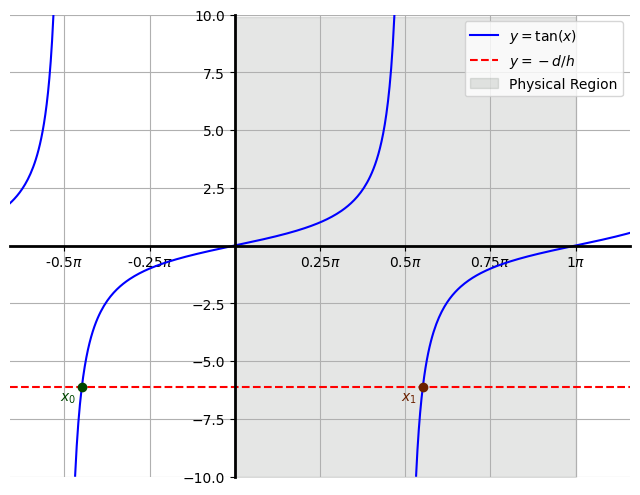

In [3]:
#| code-fold: true
#| code-summary: "Python Code Producing Graph"

# Constants
c = 6.13
epsilon = 0.1
x_interval_1 = np.linspace(-np.pi-1, -np.pi/2 - epsilon, 200)
x_interval_2 = np.linspace(-np.pi/2 + epsilon, np.pi/2 - epsilon, 200)
x_interval_3 = np.linspace(np.pi/2 + epsilon, np.pi+1, 200)

plt.figure(figsize=(8, 6))

plt.plot(x_interval_1, np.tan(x_interval_1), 'b')
plt.plot(x_interval_2, np.tan(x_interval_2), 'b')
plt.plot(x_interval_3, np.tan(x_interval_3), 'b', label=r'$y = \tan(x)$')

plt.axhline(-c, color='red', linestyle='--', label=r'$y = -d/h$')

ticks = np.arange(-np.pi, np.pi + np.pi/4, step=np.pi/4)
tick_labels = [rf'{n:.2g}$\pi$' if n != 0 else '' for n in ticks/np.pi]
plt.xticks(ticks, tick_labels)

ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_color('none')  # Hide the right spine
ax.spines['top'].set_color('none')  # Hide the top spine
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove 0.0 y-tick
yticks = ax.get_yticks()
yticks = [ytick for ytick in yticks if ytick != 0.0]
ax.set_yticks(yticks)

# Calculate the x values where y=-c intersects y=tan(x)
x0 = np.arctan(-c)
x1 = x0 + np.pi

# Plot these points
plt.plot(x0, -c, color='#004700', marker='o')
plt.plot(x1, -c, color='#6c2100', marker='o')

# Annotate these points
plt.annotate('$x_0$', (x0, -c), textcoords="offset points", xytext=(-10,-10), ha='center', color='#004700')
plt.annotate('$x_1$', (x1, -c), textcoords="offset points", xytext=(-10,-10), ha='center', color='#6c2100')

# Shade the region 0<=x<=pi with a very low opacity
plt.fill_betweenx(np.arange(-10, 10, 0.1), 0, np.pi, color='#000f00', alpha=0.1, label = r'Physical Region')

plt.ylim(-10, 10)
plt.xlim(-np.pi/2 - 0.5, np.pi + 0.5)

plt.legend(loc='upper right')

plt.grid(True)
plt.show()


- In the above graph, the point $x_0$ corresponds to taking $\arctan$ of $-d/h$ without any adjustments. We can see that this would result in $\alpha + \beta < 0$ and therefore is a non-physical solution. In coordinates
  $$ x_0 = \left( \arctan\left(-\frac{d}{h}\right), -\frac{d}{h} \right) $$

- The point $x_1$ corresponds to adding $\pi$ onto $x_0$. This point is withing the shaded region $0 < x < \pi$ in which we require $\alpha + \beta$ to be in if both $\alpha$ and $\beta$ are acute. In coordinates
  $$ x_1 = \left( \pi + \arctan\left(-\frac{d}{h}\right), -\frac{d}{h} \right) $$

# An explicit example of two trajectories passing through a specific $P$

Choose 

- $\alpha = 30^\circ = \frac{\pi}{6}$

- $V = 30\text{ms}^{-1}$

- $g = 10\text{ms}^{-2}$

The equations of motion of the particle are:

$$
\begin{cases}
    y(t) = 15t - 5t^2\\
    x(t) = 15t\sqrt{3}
\end{cases}
$$

Rearranging the second for $t$ and using this to eliminate $t$ in the first equation results at the cartesian equation of the trajectory of the particle

$$
y(x) = \frac{x}{\sqrt{3}} - \frac{x^2}{135}.
$$

If we then choose $d = 6\sqrt{3}$ then the corresponding $h$ resulting in a point $P$ lying on this trajectory can be calculated:

$$
h = y(x=6\sqrt{3}) = 5.2
$$

So we are looking for another angle of projection $\beta$ that results in a second trajectory also passing through $P = (6\sqrt{3}, 5.2).$

In [4]:
#| code-fold: true
#| code-summary: "Python Code Producing GIF"

V = 30
g = 10
alpha_val = np.radians(30)
d = 12*np.sqrt(3)
h = 8.8

# Define symbolic variables
t, g, V, alpha = sp.symbols('t g V theta')

# Symbolic equations for x(t) and y(t)
x_t = V * sp.cos(alpha) * t
y_t = V * sp.sin(alpha) * t - 0.5 * g * t**2


# Create lambdified functions for numerical computation
x_num = sp.lambdify((t, V, alpha, g), x_t.subs(g, g_val), 'numpy')
y_num = sp.lambdify((t, V, alpha, g), y_t.subs(g, g_val), 'numpy')

# Calculate time of flight to the point where y(t)=0 again
t_flight = 2 * V_val * np.sin(alpha_val) / g_val
t_points = np.linspace(0, t_flight, num=300)
x_points = x_num(t_points, V_val, alpha_val, g_val)
y_points = y_num(t_points, V_val, alpha_val, g_val)

# Plotting the trajectory
fig, ax = plt.subplots()
line, = ax.plot([], [], color= '#bd0019', label=r'$\alpha = 30\degree$', zorder=1)
point, = ax.plot([], [], color='#4f0000', marker='o', zorder=2)  # Red point for the particle
fixed_point, = ax.plot([d], [h], color='k', marker='o' , zorder=3) 
ax.annotate(r'$P = (6\sqrt{3}, 8.8)$', (d, h), textcoords="offset points", xytext=(+45,-15), ha='center', color='k')

ax.set_xlim(0, 80)
ax.set_ylim(0, 50)
ax.set_xlabel('Horizontal distance (m)')
ax.set_ylabel('Vertical distance (m)')
ax.set_title(r'A single trajectory with $V = 30$ms$^{-1}$ and $\alpha = 30\degree$')
ax.grid(True)
ax.legend()

# Function to update the plot
def update(frame):
    line.set_data(x_points[:frame], y_points[:frame])
    point.set_data([x_points[frame]], [y_points[frame]])
    return line, point,

# Create and save the animation as a GIF
ani = FuncAnimation(fig, update, frames=len(t_points), interval=30)
ani.save('gif/trajectory2.gif', writer='pillow', fps=30)  # Specify writer and fps

plt.close(fig)

# Display the GIF in the notebook
HTML('<img src="gif/trajectory2.gif" />')

To determine the existence of $\beta$ we need to verify the inequality $kd > h + \sqrt{h^2 + d^2}$.

$$
kd = \frac{V^2}{g} = \frac{900}{10} = 90
$$

$$
h + \sqrt{h^2 + d^2} \approx 16.82
$$

The inequality $kd > h + \sqrt{h^2 + d^2}$ is satisfied so there is another angle of projection $\beta$ resulting in a trajectory passing through $P$. In general $\beta$ is given by the expression

$$
\beta = \pi - \alpha - \arctan\left(\frac{d}{h}\right)
$$

In our case we have $\alpha = \pi / 3$ which leads to $\beta$ exactly given by 

$$
\beta = \frac{5\pi}{6} - \arctan \left(\frac{15\sqrt{3}}{16} \right)
$$

and $\beta$ approximately given by

$$
\begin{aligned}
\beta &\approx 1.511 \text{ rad}\\
      &\approx 86.57 ^\circ
\end{aligned}
$$

In [5]:
#| code-fold: true
#| code-summary: "Python Code Producing GIF"

# Constants
V_val = 30
g_val = 10
alpha_val = np.radians(30)
d = 12 * np.sqrt(3)
h = 8.8
beta_val = np.pi - alpha_val - np.arctan(d / h)

# Define symbolic variables
t, g, V, alpha = sp.symbols('t g V theta')

# Symbolic equations for x(t) and y(t)
x_t = V * sp.cos(alpha) * t
y_t = V * sp.sin(alpha) * t - 0.5 * g * t**2

# Create lambdified functions for numerical computation
x_num = sp.lambdify((t, V, alpha, g), x_t, 'numpy')
y_num = sp.lambdify((t, V, alpha, g), y_t, 'numpy')

# Calculate time of flight for both trajectories
t_flight_alpha = 2 * V_val * np.sin(alpha_val) / g_val
t_flight_beta = 2 * V_val * np.sin(beta_val) / g_val

# Time points for animation
t_points_alpha = np.linspace(0, t_flight_alpha, num=300)
t_points_beta = np.linspace(0, t_flight_beta, num=300)

x_points_alpha = x_num(t_points_alpha, V_val, alpha_val, g_val)
y_points_alpha = y_num(t_points_alpha, V_val, alpha_val, g_val)

x_points_beta = x_num(t_points_beta, V_val, beta_val, g_val)
y_points_beta = y_num(t_points_beta, V_val, beta_val, g_val)

# Plotting the trajectories
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Lines for trajectories
line_alpha, = ax.plot([], [], color = '#bd0019', label=r'$\alpha = 30\degree$', zorder=1)
line_beta, = ax.plot([], [], color='#0380a7', label=r'$\beta \approx 86.6\degree$', zorder=1)

# Points for the particle positions
point_alpha, = ax.plot([], [], color='#4f0000', marker='o', zorder=2)  # Red point for the alpha particle
point_beta, = ax.plot([], [], color='#0f7418', marker='o', zorder=2)  # Magenta point for the beta particle

fixed_point, = ax.plot([d], [h], color='k', marker='o' , zorder=3) 
ax.annotate(r'$P = (6\sqrt{3}, 8.8)$', (d, h), textcoords="offset points", xytext=(+45,-15), ha='center', color='k')

ax.set_xlim(0, 80)
ax.set_ylim(0, 50)
ax.set_xlabel('Horizontal distance (m)')
ax.set_ylabel('Vertical distance (m)')
ax.set_title(r'Two trajectories with $V = 30$ms$^{-1}$ passing through $P$')
ax.grid(True)
ax.legend()

# Function to update the plot
def update(frame):
    frame_alpha = min(frame, len(x_points_alpha)-1)
    frame_beta = min(frame, len(x_points_beta)-1)
    
    line_alpha.set_data(x_points_alpha[:frame], y_points_alpha[:frame])
    point_alpha.set_data([x_points_alpha[frame_alpha]], [y_points_alpha[frame_alpha]])

    line_beta.set_data(x_points_beta[:frame], y_points_beta[:frame])
    point_beta.set_data([x_points_beta[frame_beta]], [y_points_beta[frame_beta]])

    return line_alpha, point_alpha, line_beta, point_beta,

# Create and save the animation as a GIF
ani = FuncAnimation(fig, update, frames=max(len(t_points_alpha), len(t_points_beta)), interval=30)
ani.save('gif/trajectory3.gif', writer='pillow', fps=30)  # Specify writer and fps

plt.close(fig)

# Display the GIF in the notebook
HTML('<img src="gif/trajectory3.gif" />')